## The "punk" model suggested by Hogg
Here we are Taylor-expanding the Doppler-shifted spectrum so we can self-consistently model the RM effect, without assuming it's a radial velocity shift!

**This is very much a work in progress.**

In [1]:
import starry
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

$
I_\lambda(x, y) = I_\lambda^0 + \frac{\partial{I_\lambda^0}}{\partial{v}} \ \Delta v(x, y)
$

In [2]:
np.random.seed(8)
nwav = 500
wav = np.linspace(450, 600, nwav)
I = 0.5 * np.random.randn(nwav)
for i in range(12):
    mu = np.random.uniform(450, 600)
    sig = 1.0
    amp = np.random.uniform(1, 30)
    I += -amp * np.exp(-(wav - mu) ** 2 / sig ** 2)

In [3]:
wavp = np.zeros(nwav)
wavm = np.zeros(nwav)
v = 1.0
c = 3.0e8
for i in range(nwav):
    wavp[i] = (1 + v / c) * wav[i]
    wavm[i] = (1 - v / c) * wav[i]
Ip = np.interp(wav, wavp, I)
Im = np.interp(wav, wavm, I)
dIdv = (Im - Ip) / (2 * v) 

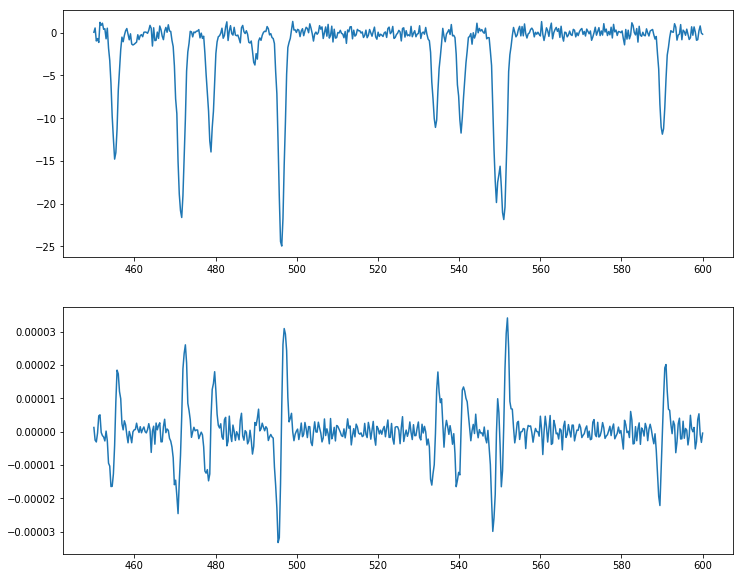

In [4]:
fig, ax = plt.subplots(2, figsize=(12, 10))
ax[0].plot(wav, I);
ax[1].plot(wav, dIdv);

In [5]:
map = starry.Map(3, nwav=nwav)
veq = 2e5
map[0, 0] = I
map[1, 1] = veq * dIdv

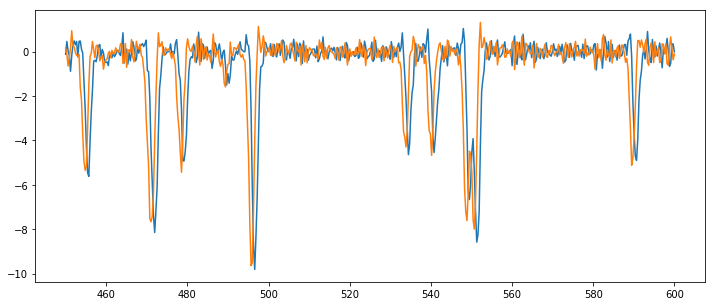

In [6]:
fig, ax = plt.subplots(1, figsize=(12, 5))
ax.plot(wav, map(x=-1).T);
ax.plot(wav, map(x=1).T);

In [7]:
xo = np.linspace(-1.5, 1.5, 1000)
yo = 0
ro = 0.3
flux = map.flux(xo=xo, yo=yo, ro=ro)

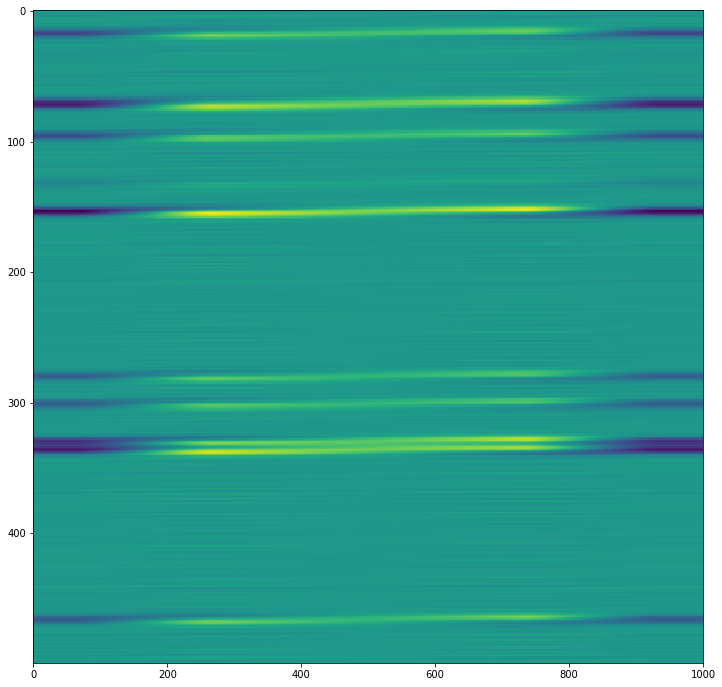

In [8]:
fig = plt.figure(figsize=(12,12))
plt.imshow(flux.T - np.mean(flux, axis=0).reshape(-1, 1))
plt.gca().set_aspect('auto')

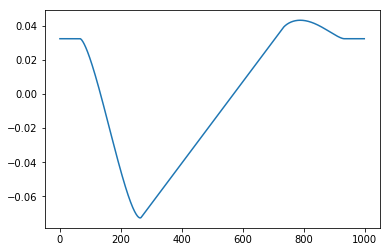

In [51]:
normflux = flux.T - np.mean(flux, axis=0).reshape(-1, 1)
plt.plot(normflux[1])

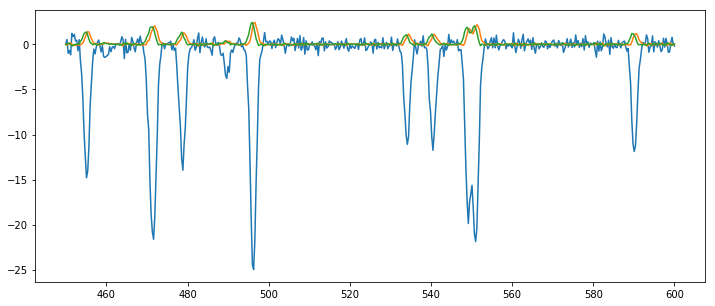

In [21]:
plt.figure(figsize=(12, 5))
plt.plot(wav, I)
plt.plot(wav, flux[250, :] - I)
plt.plot(wav, flux[750, :] - I);